# Liver Disease Prediction - Classification 

# Dataset

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

# Inspiration

Use these patient records to determine which patients have liver disease and which ones do not.

1. Data Wrangling                                                   
  1.1 Column Rename                                                 
  1.2 Impute Missing Value                                         
  1.3 Check Outlier                                                                                                                     
2. Exploratory Data Analysis                                       
  2.1 Variable Interpretation                                       
  2.2 Categorical Variable - Encoding                               
  2.3 Correlation Visualization                                                                             
3. Data Modeling                                                   
  3.1 K-NN Model                                                                                                          
    3.1.1 Prediction Analysis                                       
    3.1.2 Hyper-parameter Tuning                                     
  3.2 Logistic Regression                                           
  3.3 Decision Tree                                                 
  3.4 Random Forest                                                 
  3.5 Model Optimization                                           
    3.5.1 Balance Dataset - Oversample                             
    3.5.2 Standardization - Scale                                   
    3.5.3 Multicollinearity                                         
  3.6 Prediction                                                           
  
4. Improvement Space

 

### Import Packages

In [120]:
# Packages for EDA, visualization and preprocessing
from mlxtend.plotting import plot_decision_regions
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
%matplotlib inline

# Packages for classification algorithms
from scipy import stats
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [121]:
# Loading dataset
liver = pd.read_csv('/Users/stevenli/Desktop/liver.csv')

In [122]:
# Take a look at the dataframe
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# 1. Data Wrangling

## 1.1 Column Rename

Dependent variable: 'Dataset'                                              
               '1' - Patient has liver disease                                           
                '2' - Patient has no disease

In [123]:
# Rename 'Dataset' to 'Disease' 
# Correct column name typo 
liver = liver.rename(columns={'Dataset':'Disease','Alamine_Aminotransferase':'Alanine_Aminotransferase'}, inplace=False)

In [124]:
# Display basic information
liver.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
# Numerical variables statistical information
liver.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alanine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Disease,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


## 1.2 Missing Value 

In [125]:
# Check missing value
print(liver.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Disease                       0
dtype: int64


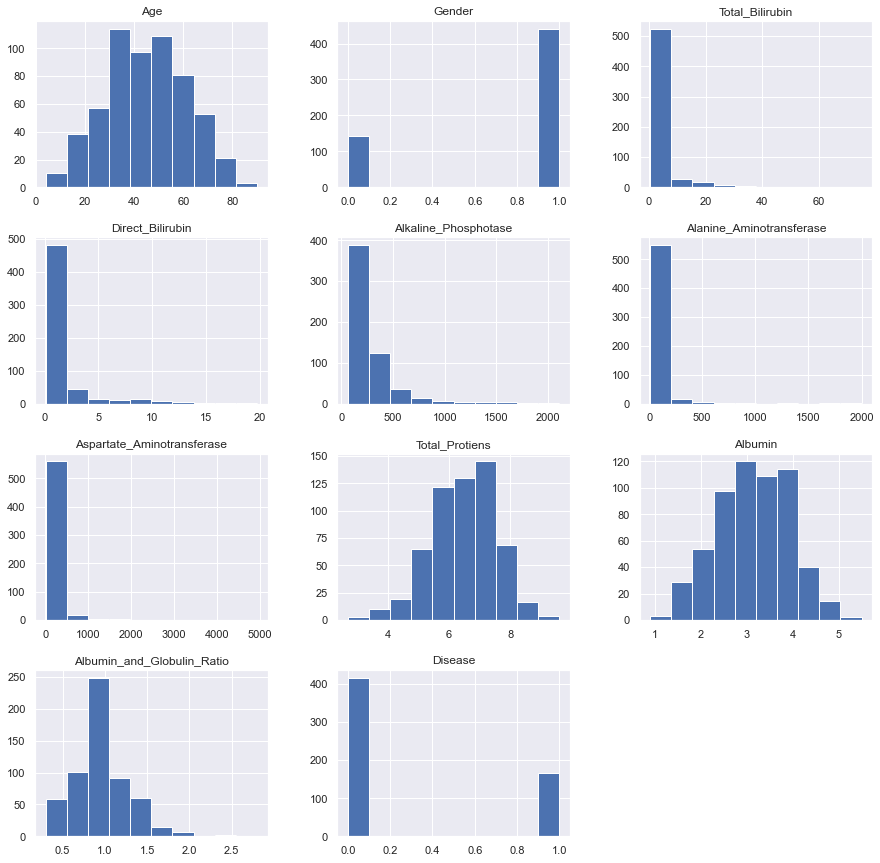

In [59]:
# Visualize statistical distribution
# Find the way to impute missing value
p = liver.hist(figsize = (15,15))

In [126]:
# The missing value 'Albumin_and_Globulin_Ratio' shows a normal distribution with positive skewness
# Impute with median or mean, here I apply median
liver['Albumin_and_Globulin_Ratio'].fillna(liver['Albumin_and_Globulin_Ratio'].median(), inplace = True)

In [127]:
# Checking missing values again
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Disease                       0
dtype: int64

## 1.3 Outlier

Text(0, 0.5, 'Ratio')

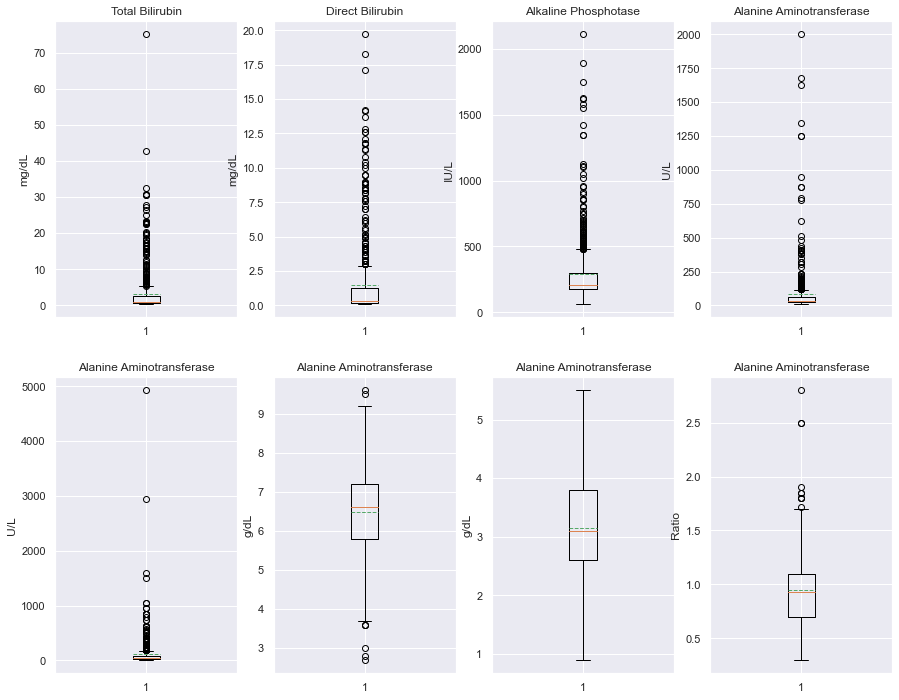

In [60]:
# Check outliers
plt.figure(figsize=[15,12])

plt.subplot(241)
plt.boxplot(liver['Total_Bilirubin'], showmeans = True, meanline = True)
plt.title('Total Bilirubin')
plt.ylabel('mg/dL')

plt.subplot(242)
plt.boxplot(liver['Direct_Bilirubin'], showmeans = True, meanline = True)
plt.title('Direct Bilirubin')
plt.ylabel('mg/dL')

plt.subplot(243)
plt.boxplot(x = liver['Alkaline_Phosphotase'], showmeans = True, meanline = True)
plt.title('Alkaline Phosphotase')
plt.ylabel('IU/L')

plt.subplot(244)
plt.boxplot(liver['Alanine_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase')
plt.ylabel('U/L')

plt.subplot(245)
plt.boxplot(liver['Aspartate_Aminotransferase'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase')
plt.ylabel('U/L')

plt.subplot(246)
plt.boxplot(liver['Total_Protiens'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase')
plt.ylabel('g/dL')

plt.subplot(247)
plt.boxplot(liver['Albumin'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase')
plt.ylabel('g/dL')

plt.subplot(248)
plt.boxplot(liver['Albumin_and_Globulin_Ratio'], showmeans = True, meanline = True)
plt.title('Alanine Aminotransferase')
plt.ylabel('Ratio')

Medical numerical statistics such as indices or ratios normally have a range, in which they are considered acceptable.                   
But this dataset mostly fills with patients whose medical indicators possibly will not fall in the normal range. After researched all indicators online, reports showed that it is plausible for some indicators having abnormally low/high results, they probably should not be considered as outliers.

# 2. EDA

## 2.1 Variable Interpretation

Total_Bilirubin (mg/dL): 0.3 to 1.2 

Direct_Bilirubin (mg/dL): 0 to 0.4 

Alkaline_Phosphatase (IU/L): 20 to 147 

Alanine_Aminotransferase (U/L): 7 to 55 

Aspartate_Aminotransferase (U/L): 9 to 40 

Total_Proteins (g/dL): 6.0 to 8.3 

Albumin (g/dL): 3.4 to 5.4 

Albumin_and_Globulin_Ratio: 0.9 to 2.7

These indices can vary with age and gender.                                            Patients with liver issues always dispaly a abnormal results.

## 2.2 Categorical Variable - Encoding

In [128]:
# Encode 'Gender', 'Disease'
label = LabelEncoder()
liver['Gender'] = label.fit_transform(liver['Gender'].astype('str'))

label1 = LabelEncoder()
liver['Disease'] = label1.fit_transform(liver['Disease'].astype('str'))
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


## 2.3 Correlation Visualization

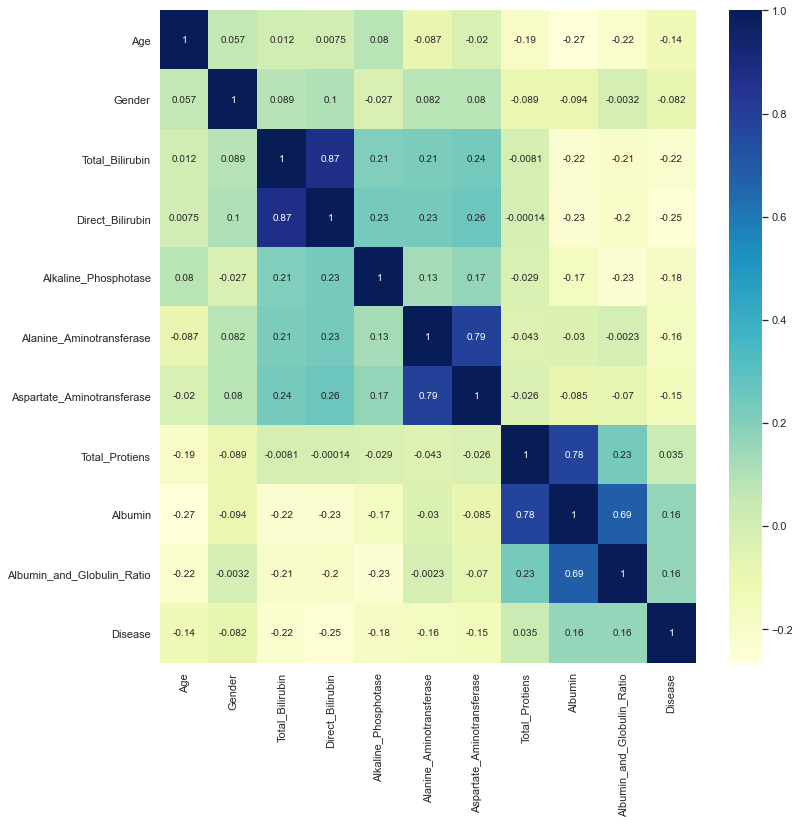

In [61]:
# Check heatmap
plt.figure(figsize=(12,12))  
p=sns.heatmap(liver.corr(), annot=True,cmap ='YlGnBu') 

Above 0.75, there are three pairs of features showing high correlation, I firstly choose the most correlated feature pair and delete feature 'Direct_Bilirubin'. 

In [129]:
liver1 = liver.drop(['Direct_Bilirubin'], axis=1)

# 3. Data Modeling

## 3.1 K-NN Model

In [130]:
X = liver1.drop("Disease",axis = 1)
y = liver1.Disease
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187,16,18,6.8,3.3,0.90
1,62,1,10.9,699,64,100,7.5,3.2,0.74
2,62,1,7.3,490,60,68,7.0,3.3,0.89
3,58,1,1.0,182,14,20,6.8,3.4,1.00
4,72,1,3.9,195,27,59,7.3,2.4,0.40


In [131]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [132]:
# Fit model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [133]:
# Predicting X_test
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7098445595854922

Highest accuracy : 0.7461139896373057 , k = 6


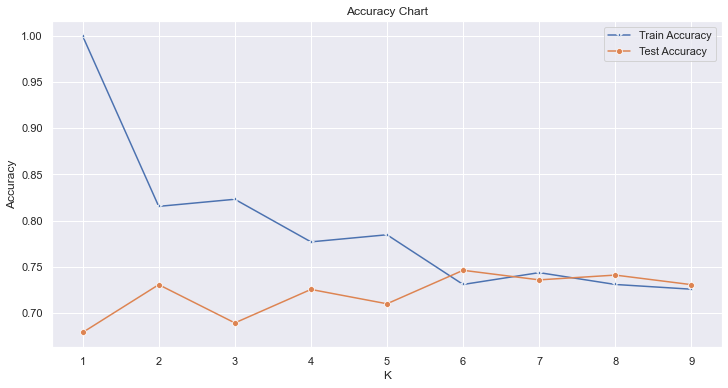

In [134]:
# Find optimal K with highest accuracy score

number = np.arange(1, 10)
train_accuracy, test_accuracy = [], []

for k in number:
    # k from 1 to 10
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit 
    knn.fit(X_train,y_train)
    # Train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # Test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Visualization
plt.figure(figsize=(12,6))
p = sns.lineplot(range(1,10),train_accuracy,marker='*',label='Train Accuracy')
p = sns.lineplot(range(1,10),test_accuracy,marker='o',label='Test Accuracy')
plt.title('Accuracy Chart')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Highest accuracy : {} , k = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [143]:
# Calculate error for K from 1 to 10
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

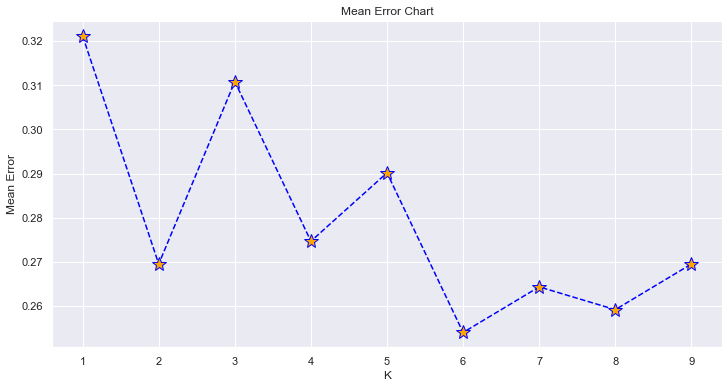

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='blue', linestyle='dashed', marker='*',
         markerfacecolor='orange', markersize=15)
plt.title('Mean Error Chart')
plt.xlabel('K')
plt.ylabel('Mean Error')

### 3.1.1 Prediction Analysis

Text(0.5, 12.5, 'Predicted')

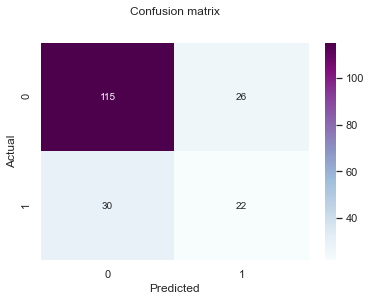

In [75]:
# Import confusion_matrix
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="BuPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [76]:
# Import classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       141
           1       0.46      0.42      0.44        52

    accuracy                           0.71       193
   macro avg       0.63      0.62      0.62       193
weighted avg       0.70      0.71      0.71       193



In [77]:
actual_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_predict.head(15)

,Actual,Predicted
355,1,1
407,0,0
90,0,0
402,0,0
268,0,0
356,0,0
110,1,1
488,1,0
132,1,1
497,0,0


In [79]:
# Print test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred)
print('Test ROC AUC score: {:.3f}'.format(test_roc_auc))

Test ROC AUC score: 0.619


Above scores and reports showing that the prediction accuracy is not ideal enough, the model might have limited capacity to accurately distinguish about whether the patient has liver issue or not. So I will use Hyper-parameter Tuning to find the optimal K value.

### 3.1.2 Hyperparameter Tuning - GridSearch

In [146]:
grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
cv= GridSearchCV(knn,grid,cv=5)
cv.fit(X,y)
print("Best Parameter: " + str(cv.best_params_))

Best Parameter: {'n_neighbors': 45}


## 3.2 - 3.4 Logistic, Decision Tree, Random Forest

Involve more models to make prediction

In [88]:
# Logistic Regression
Logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
Logistic.fit(X_train, y_train)
Logistic_pred = Logistic.predict(X_test) 
print("Logistic Regression Model Accuracy:" + str(accuracy_score(y_test, Logistic_pred)))


# Decision Trees
Trees = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
Trees.fit(X_train, y_train)
Trees_pred = Trees.predict(X_test) 
print("Decision Trees Model Accuracy:" + str(accuracy_score(y_test, Trees_pred)))


# Random Forests
Forests = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
Forests.fit(X_train, y_train)
Forests_pred = Forests.predict(X_test) 
print("Random Forests Model Accuracy:" + str(accuracy_score(y_test, Forests_pred)))

Logistic Regression Model Accuracy:0.7253886010362695
Decision Trees Model Accuracy:0.694300518134715
Random Forests Model Accuracy:0.7305699481865285


Given all models, the accuracy shows that there is slightly differences between models, so I am going to optimize models and try to achieve a higher prediction accuracy.

## 3.5 Model Optimization

### 3.5.1 Balance Dataset - Oversample

0    416
1    167
Name: Disease, dtype: int64


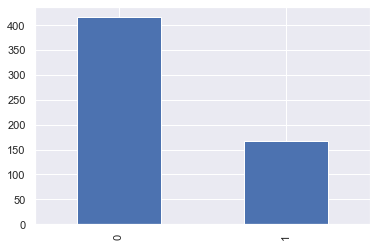

In [89]:
# Checking the balance of the dataset 
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = liver["Disease"].map(lambda x: color_wheel.get(x + 1))
print(liver.Disease.value_counts())
p=liver.Disease.value_counts().plot(kind="bar")

In [90]:
# The dataset shows significant unbalancing
# Oversample the unbalanced dataset

oversample = RandomOverSampler()
x, y = oversample.fit_resample(liver.drop(['Disease'], axis=1), liver['Disease'])

livernew = pd.DataFrame(x, columns=liver.drop(['Disease'], axis=1).columns)
livernew['Disease'] = y

livernew.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


1    416
0    416
Name: Disease, dtype: int64


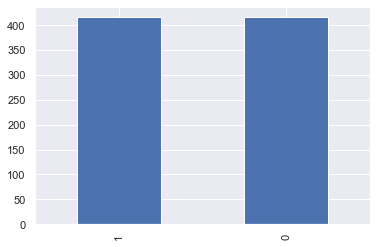

In [91]:
# Check again
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = livernew["Disease"].map(lambda x: color_wheel.get(x + 1))
print(livernew.Disease.value_counts())
p=livernew.Disease.value_counts().plot(kind="bar")

In [92]:
livernew.std()

Age                            16.335851
Gender                          0.442567
Total_Bilirubin                 5.311980
Direct_Bilirubin                2.416302
Alkaline_Phosphotase          213.538843
Alanine_Aminotransferase      155.048439
Aspartate_Aminotransferase    244.841956
Total_Protiens                  1.083473
Albumin                         0.794869
Albumin_and_Globulin_Ratio      0.315265
Disease                         0.500301
dtype: float64

### 3.5.2 Standardization - Scale

Because all variables are or have been transferred to numerical variables, features with same scale could be more easily and effectively applied into algorithms.

In [93]:
# Standarizing numerical variables
numerical= list(livernew.select_dtypes(exclude=object).columns.drop(["Disease"]))
process = livernew[numerical].values
rescale = StandardScaler().fit(process)
livernew[numerical] = pd.DataFrame(rescale.transform(process))
livernew[numerical].head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.295124,-1.657633,-0.367021,-0.438742,-0.374588,-0.328840,-0.294760,0.265621,0.127093,-0.215264
1,1.111368,0.603270,1.554322,1.797423,2.024544,-0.019073,0.040351,0.912080,0.001210,-0.723078
2,1.111368,0.603270,0.876201,1.217676,1.045211,-0.044887,-0.090424,0.450324,0.127093,-0.247002
3,0.866361,0.603270,-0.310511,-0.314510,-0.398018,-0.341747,-0.286586,0.265621,0.252976,0.102120
4,1.723887,0.603270,0.235753,0.348057,-0.337102,-0.257852,-0.127204,0.727377,-1.005851,-1.802184


### 3.5.3 Multicollinearity

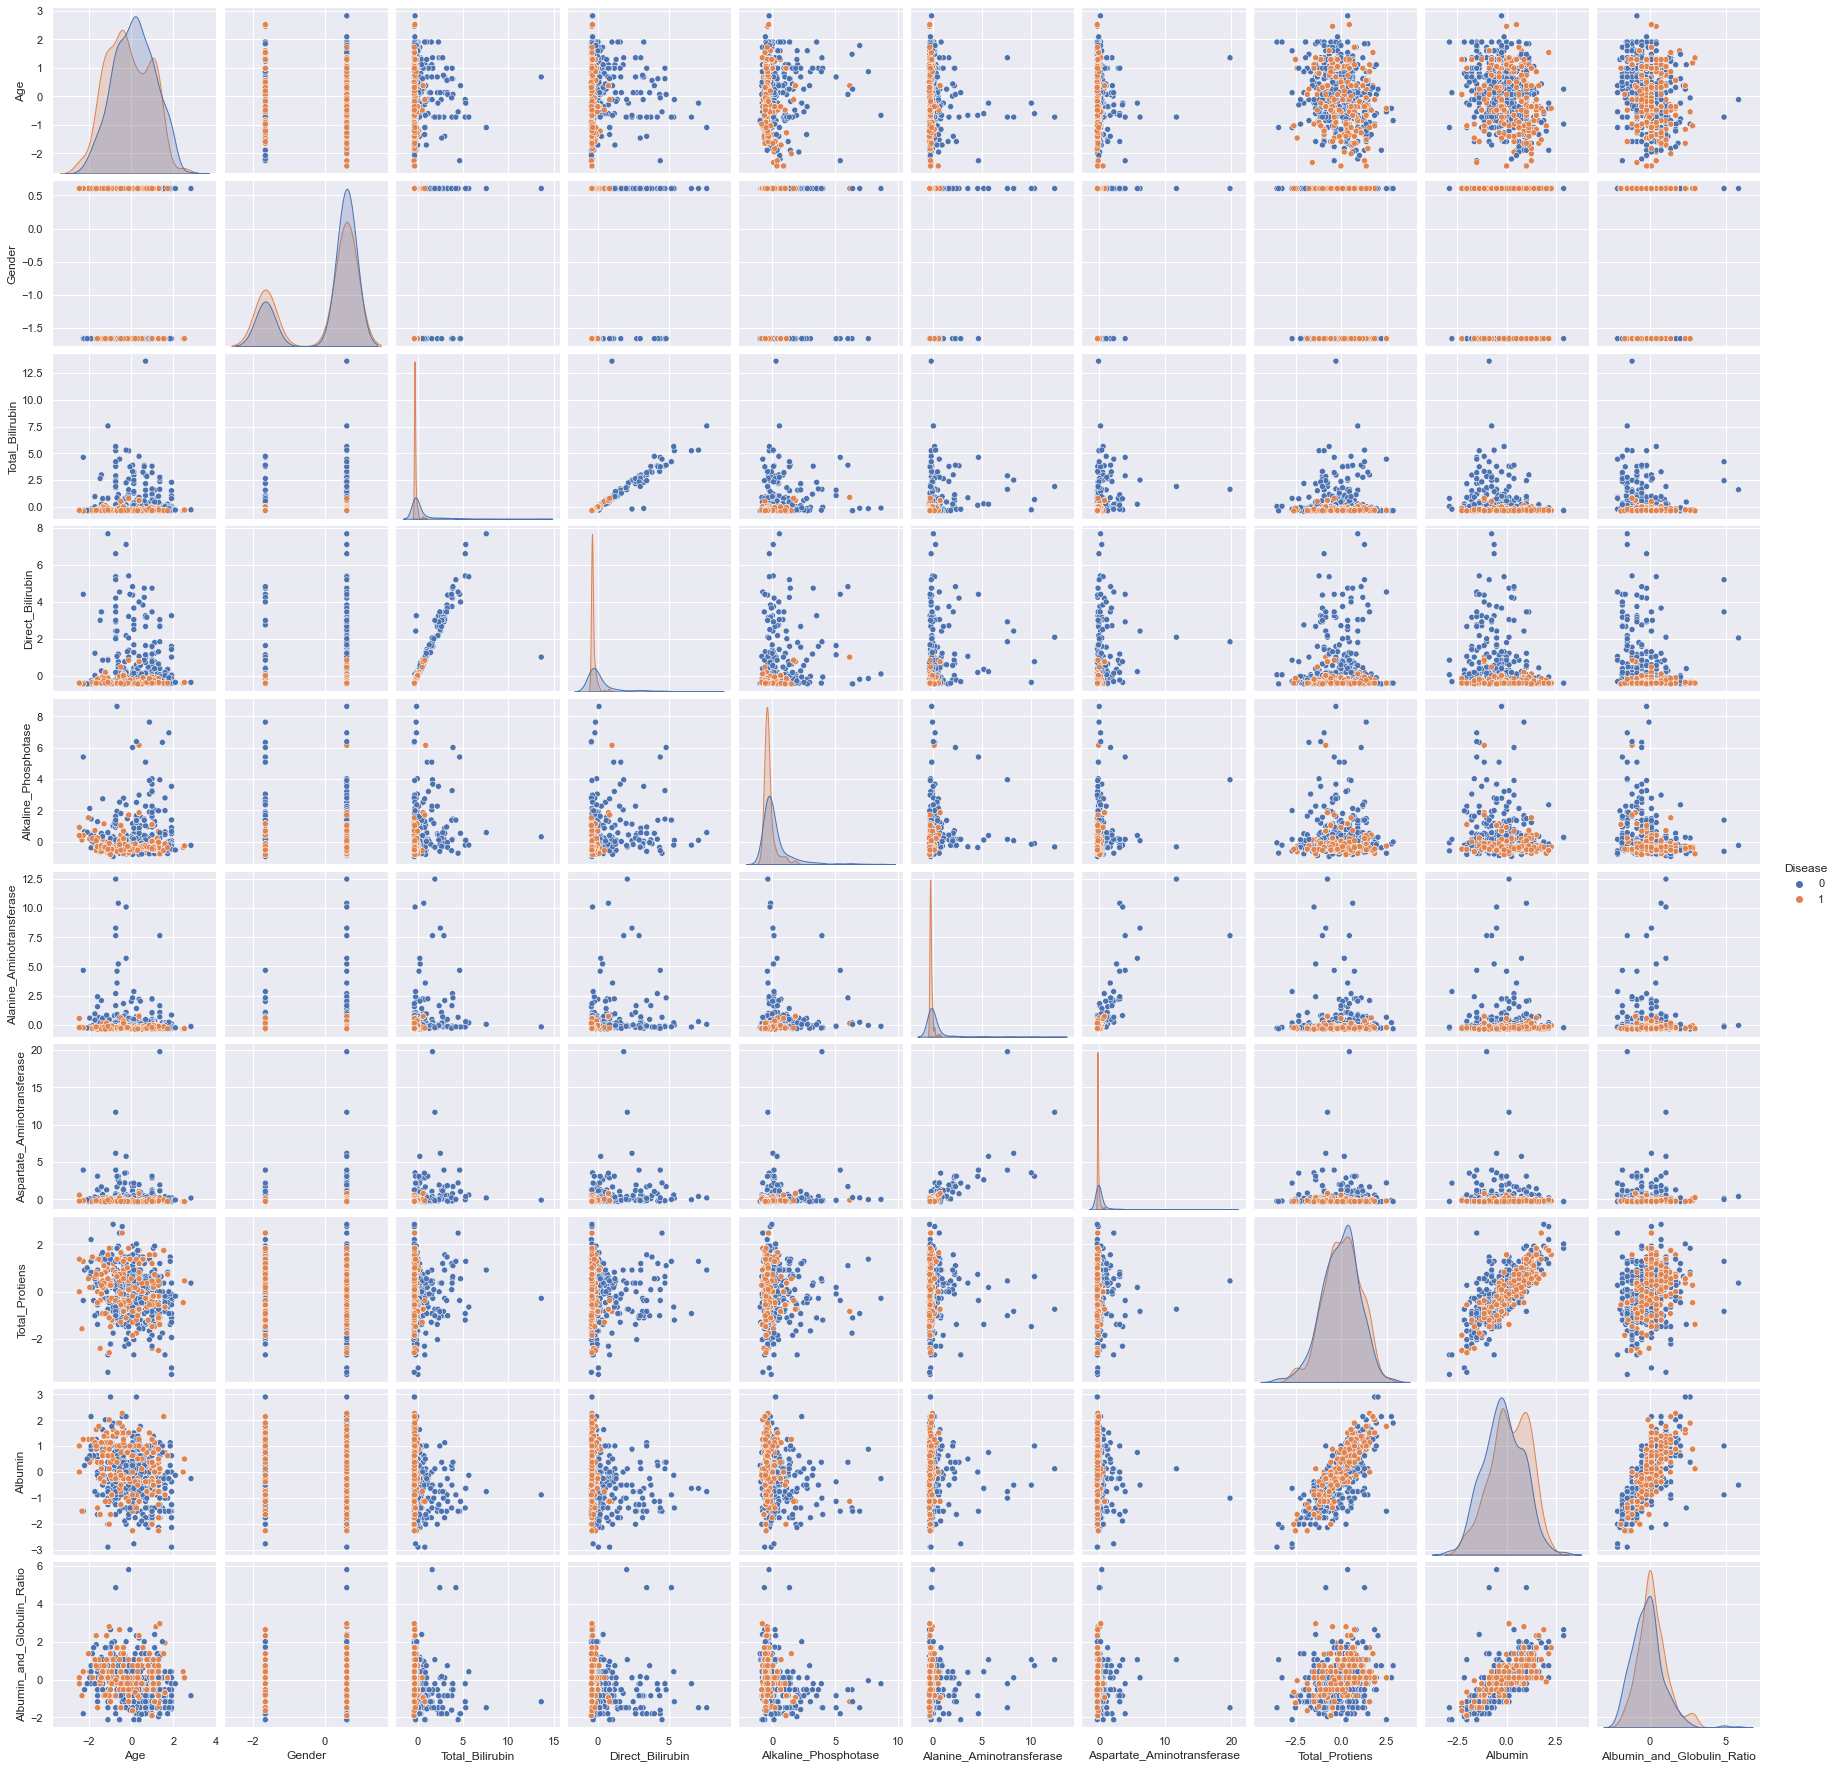

In [95]:
# Check correlation
p=sns.pairplot(livernew, hue = 'Disease')

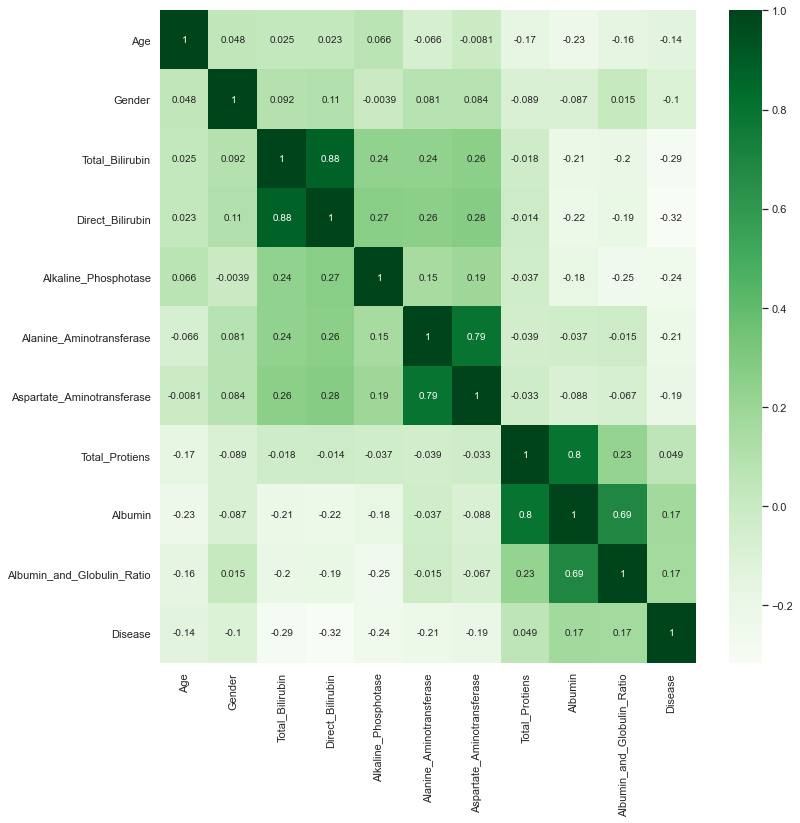

In [96]:
# Check heatmap
plt.figure(figsize=(12,12))  
p=sns.heatmap(livernew.corr(), annot=True,cmap ='Greens') 

In [97]:
# Now I will drop all variables with high (above 0.78) association
livernew1 = livernew.drop(['Albumin','Alanine_Aminotransferase','Direct_Bilirubin'], axis=1)

## 3.6 Data Modeling

In [98]:
X1 = livernew1.drop("Disease",axis = 1)
y1 = livernew1.Disease
X1.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,1.295124,-1.657633,-0.367021,-0.374588,-0.294760,0.265621,-0.215264
1,1.111368,0.603270,1.554322,2.024544,0.040351,0.912080,-0.723078
2,1.111368,0.603270,0.876201,1.045211,-0.090424,0.450324,-0.247002
3,0.866361,0.603270,-0.310511,-0.398018,-0.286586,0.265621,0.102120
4,1.723887,0.603270,0.235753,-0.337102,-0.127204,0.727377,-1.802184


In [99]:
# Split dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [102]:
# Logistic Regression
Logistic1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
Logistic1.fit(X_train1, y_train1)
Logistic_pred1 = Logistic1.predict(X_test1) 
print("Logistic Regression Model Accuracy:" + str(accuracy_score(y_test1, Logistic_pred1)))


# Decision Trees
Trees1 = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
Trees1.fit(X_train1, y_train1)
Trees_pred1 = Trees1.predict(X_test1) # predicts the Y given the fitted model dt
print("Decision Trees Model Accuracy:" + str(accuracy_score(y_test1, Trees_pred1)))


# Random Forests
Forests1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
Forests1.fit(X_train1, y_train1)
Forests_pred1 = Forests1.predict(X_test1) # predicts the Y given the fitted model rf
print("Random Forests Model Accuracy:" + str(accuracy_score(y_test1, Forests_pred1)))

Logistic Regression Model Accuracy:0.6763636363636364
Decision Trees Model Accuracy:0.7854545454545454
Random Forests Model Accuracy:0.7381818181818182


Given all models, only 2 out 3 models show a slight increase in accuracy. So next part I will brainstorm the possible ways to improve the model accuracy and walk through the project again to seek any revision space.

# 4. Improvement Space

1. Dataset only contains 583 rows, inadequate sample size could somehow impact prediction results.                                               
2. When imputing missing value, I use median method, it is plausible due to the analysis of statistical distribution. But when missing value amount is small (e.g., less than 1%), directly removing them could be an effective way, especially when dealing with medical data, unusually high/low data points do exist.                                           
3. Outliers are seriously considered, so the dataset might still contain outliers.
4. Features selection is crucial especially when there are only 10 independent variables. So I perform feature selection specifically for random forest model, ranking the importance of each feature as follow.             
5. Oversample also could lead to low accuracy when performing on a small dataset.                                                                 6. When categorical variables have zero variation or too many levels, dropping them if necessary could minimize the error they may cause. (In this dataset, there is only one nominal variable 'Gender' so I didn't apply that.                                                              

In [ ]:
# Dropping categorical variables with zero variation
# variables = list(liver.select_dtypes(include=object).columns)
# drop = []
# for column in variables:
    # if len(liver[column].value_counts().index)==1:
        # drop.append(column)
# drop

# Dropping categorical variables with too many levels:
# level = []
# for column in variables:
    # if len(liver[column].value_counts().index)>100:
        # level.append(column)
# level

## 4.1 Feature Selection - Importance Rank

In [104]:
# Check feature importance rank of random forest model
Forestfeature = RandomForestClassifier()
Forestfeature.fit(X_train, y_train)

importances = Forestfeature.feature_importances_

print("Feature Importance:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), liver.columns), reverse=True):
    print (v + ": " + str(k))

Feature Importance:
Direct_Bilirubin: 0.1573
Alanine_Aminotransferase: 0.1455
Alkaline_Phosphotase: 0.1399
Age: 0.1304
Total_Bilirubin: 0.1205
Aspartate_Aminotransferase: 0.1032
Total_Protiens: 0.1026
Albumin: 0.082
Gender: 0.0186


In [ ]:
# End